In [4]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt ,seaborn as sns,warnings

from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('survey_results_public.csv')
data.head(5)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [6]:
# Assuming df is your DataFrame
data['Country'].replace('United Kingdom of Great Britain and Northern Ireland', 'Great Briten & Northern Ireland', inplace=True)


In [7]:
df = data[['Country','YearsCodePro','EdLevel','Employment','ConvertedCompYearly']]
df = df.rename({'ConvertedCompYearly':'Salary'},axis=1)
df.head()

,Country,YearsCodePro,EdLevel,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,United States of America,9,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",285000.0
2,United States of America,23,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",250000.0
3,United States of America,7,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",156000.0
4,Philippines,4,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time;Independent contractor, fr...",23456.0


In [8]:
df.shape

(89184, 5)

In [9]:
df.isnull().mean()*100


Country          1.357867
YearsCodePro    25.843201
EdLevel          1.357867
Employment       1.441963
Salary          46.157382
dtype: float64

In [10]:
df = df.dropna()
df.shape

(47813, 5)

In [11]:
# we are consiering the only Employees who are employed fulltime
df = df[df['Employment'] == 'Employed, full-time']
df = df.drop('Employment',axis=1)
df.head()
df

,Country,YearsCodePro,EdLevel,Salary
1,United States of America,9,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",285000.0
2,United States of America,23,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",250000.0
3,United States of America,7,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",156000.0
5,Great Briten & Northern Ireland,21,Some college/university study without earning ...,96828.0
6,United States of America,3,Some college/university study without earning ...,135000.0
...,...,...,...,...
89160,Mexico,5,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",28625.0
89162,Brazil,24,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",50719.0
89167,India,2,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",15752.0
89170,France,9,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",64254.0


In [12]:
# here we are filtering the country columns on the basis of value_ciunts if the value Counts are below 400 then they are marked as into other column
def remove_values(categories,cutoff):
    categories_dict = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categories_dict[categories.index[i]] = categories.index[i]
        else:
            categories_dict[categories.index[i]] = 'other'
    return categories_dict

In [13]:
country_map = remove_values(df['Country'].value_counts(),400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()


Country
United States of America           10569
other                               9282
Germany                             3201
Great Briten & Northern Ireland     3072
Canada                              1807
India                               1600
France                              1458
Netherlands                         1002
Australia                            985
Brazil                               972
Spain                                966
Sweden                               882
Italy                                826
Poland                               740
Switzerland                          511
Denmark                              440
Norway                               428
Israel                               414
Name: count, dtype: int64

In [14]:
df.describe()

,Salary
count,3.915500e+04
mean,9.842252e+04
std,3.328679e+05
min,1.000000e+00
25%,4.497800e+04
50%,7.500000e+04
75%,1.236070e+05
max,5.751383e+07


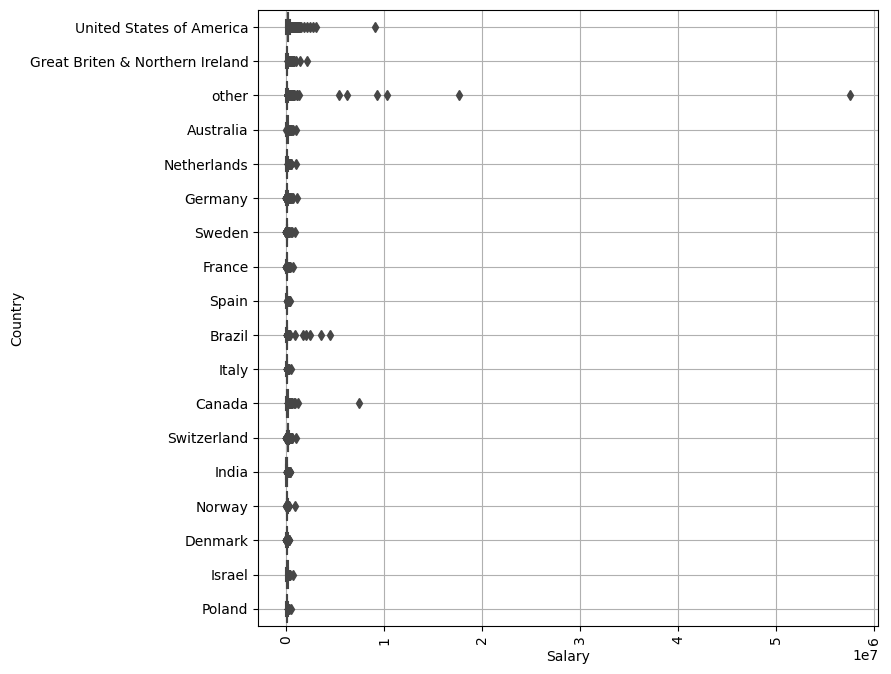

In [15]:
plt.figure(figsize=(8,8))
plt.xticks(rotation = 90)
sns.boxplot(x= df['Salary'],y=df['Country'])
plt.yticks()
plt.grid()
plt.show()

In [16]:
df.shape

(39155, 4)

In [17]:
# lets trimm the outliers 
## remove some outliers and then then appply the capping mechanism 
df = df[df['Salary'] <= 250000]
df = df[df['Salary'] >= 100000]
df = df[df['Country'] != 'other']
df.shape

(11684, 4)

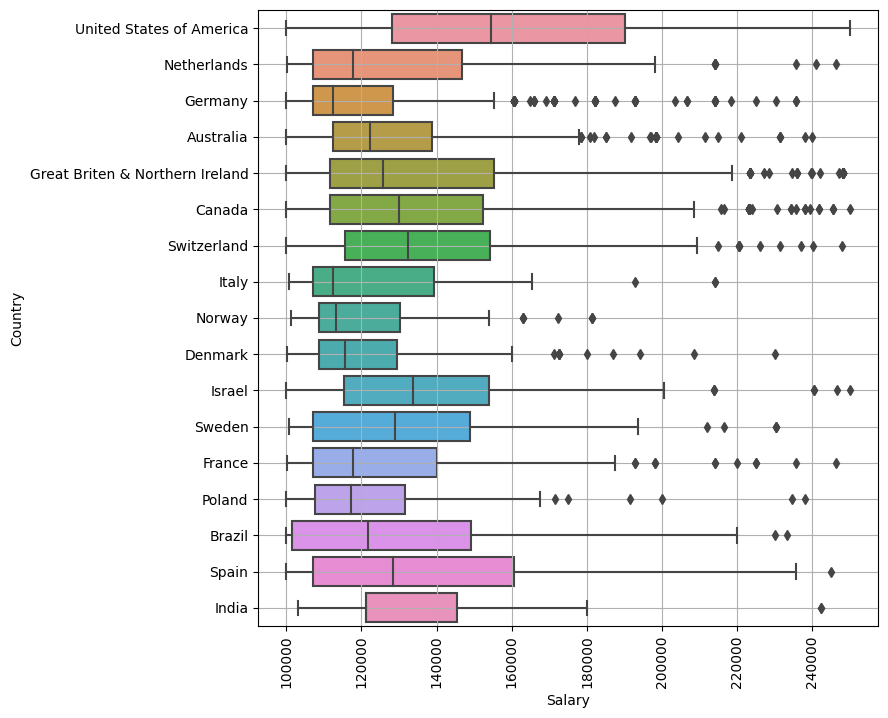

In [18]:
plt.figure(figsize=(8,8))
plt.xticks(rotation = 90)
sns.boxplot(x= df['Salary'],y=df['Country'])
plt.yticks()
plt.grid()
plt.show()

In [19]:
# rewiting the yearscodepro 

df['YearsCodePro'].unique()

array(['23', '7', '3', 'Less than 1 year', '10', '19', '15', '6', '2',
       '16', '9', '28', '24', '5', '12', '4', '20', '25', '30', '27',
       '43', '18', '33', '8', '22', '21', '11', '14', '42', '17', '26',
       '13', '31', '36', '39', '29', '40', '32', '44', '1', '34', '35',
       '37', 'More than 50 years', '41', '50', '38', '45', '47', '48',
       '49', '46'], dtype=object)

In [20]:
def cleaned_experience(x):
    if x =="More than 50 years":
        return 50
    elif x == "Less than 1 year":
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(cleaned_experience)

In [21]:
df['YearsCodePro'].unique()

array([23. ,  7. ,  3. ,  0.5, 10. , 19. , 15. ,  6. ,  2. , 16. ,  9. ,
       28. , 24. ,  5. , 12. ,  4. , 20. , 25. , 30. , 27. , 43. , 18. ,
       33. ,  8. , 22. , 21. , 11. , 14. , 42. , 17. , 26. , 13. , 31. ,
       36. , 39. , 29. , 40. , 32. , 44. ,  1. , 34. , 35. , 37. , 50. ,
       41. , 38. , 45. , 47. , 48. , 49. , 46. ])

In [22]:
# lets clean  the data of the EdLevel 

def clean_edlevel(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelors degree'

    elif 'Master’s degree' in x:
        return 'Master’s degree'
    
    elif 'Professional degree' in x:
        return 'Professional degree'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_edlevel)


In [23]:
object_columns = df.select_dtypes(include='object')
object_columns

,Country,EdLevel
2,United States of America,Bachelors degree
3,United States of America,Bachelors degree
6,United States of America,Less than a Bachelors
13,United States of America,Master’s degree
14,Netherlands,Master’s degree
...,...,...
89112,United States of America,Bachelors degree
89113,United States of America,Bachelors degree
89139,United States of America,Master’s degree
89141,United States of America,Bachelors degree


In [24]:
for i in object_columns.columns:
    print('*' * 100)
    print(df[i].value_counts())

****************************************************************************************************
Country
United States of America           7657
Great Briten & Northern Ireland     882
Canada                              701
Germany                             554
Australia                           399
Switzerland                         370
Israel                              260
Netherlands                         194
Denmark                             179
France                              117
Brazil                               70
Spain                                65
Poland                               64
Norway                               56
Sweden                               53
India                                33
Italy                                30
Name: count, dtype: int64
****************************************************************************************************
EdLevel
Bachelors degree         6454
Master’s degree          2771
Less than a Bach

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11684 entries, 2 to 89156
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       11684 non-null  object 
 1   YearsCodePro  11684 non-null  float64
 2   EdLevel       11684 non-null  object 
 3   Salary        11684 non-null  float64
dtypes: float64(2), object(2)
memory usage: 456.4+ KB


In [26]:
df.head()

,Country,YearsCodePro,EdLevel,Salary
2,United States of America,23.0,Bachelors degree,250000.0
3,United States of America,7.0,Bachelors degree,156000.0
6,United States of America,3.0,Less than a Bachelors,135000.0
13,United States of America,0.5,Master’s degree,150000.0
14,Netherlands,7.0,Master’s degree,187407.0


In [27]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder() 

df['Country']= label_encoder.fit_transform(df['Country'])


In [28]:
df['Country'].value_counts()

Country
16    7657
6      882
2      701
5      554
0      399
15     370
8      260
10     194
3      179
4      117
1       70
13      65
12      64
11      56
14      53
7       33
9       30
Name: count, dtype: int64

In [29]:
df.head()

,Country,YearsCodePro,EdLevel,Salary
2,16,23.0,Bachelors degree,250000.0
3,16,7.0,Bachelors degree,156000.0
6,16,3.0,Less than a Bachelors,135000.0
13,16,0.5,Master’s degree,150000.0
14,10,7.0,Master’s degree,187407.0


In [30]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[['Less than a Bachelors','Professional degree','Bachelors degree','Master’s degree']])

df['EdLevel']= ordinal_encoder.fit_transform(df[['EdLevel']])
df.head()

,Country,YearsCodePro,EdLevel,Salary
2,16,23.0,2.0,250000.0
3,16,7.0,2.0,156000.0
6,16,3.0,0.0,135000.0
13,16,0.5,3.0,150000.0
14,10,7.0,3.0,187407.0


In [31]:
x = df.drop('Salary',axis=1)
y = df['Salary']

In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24)
X_train.head()

,Country,YearsCodePro,EdLevel
83342,16,9.0,3.0
16499,16,24.0,0.0
45521,16,7.0,2.0
7993,16,6.0,2.0
35675,16,17.0,2.0


In [33]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(random_state=0)
random_forest.fit(X_train,y_train)
predictions = random_forest.predict(X_test)

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
error = np.sqrt(mean_squared_error(y_test,predictions))
error

37666.86243706679

#### Applying GRid Search CV method 

In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators':[50,100,200],
    'max_depth':[None,10,20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}


grid_search = GridSearchCV(random_forest,param_grid,cv=5)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

In [36]:
random_forest = grid_search.best_estimator_
random_forest.fit(X_train,y_train)

predictions = random_forest.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(y_test,predictions))
error

36689.25135579697

In [38]:
x = np.array([['United States of America',12,'Master’s degree']])
x

array([['United States of America', '12', 'Master’s degree']],
      dtype='<U24')

In [39]:
x[:,0] = label_encoder.transform(x[:,0])
x[:,2] = ordinal_encoder.transform([x[:,2]])

In [40]:
prediction = random_forest.predict(x)
prediction

array([170040.50320013])

In [41]:
# i will deploy it buddy 
import pickle 
import os  # Import the os module for handling directories

# Ensure 'models/' directory exists
os.makedirs('models', exist_ok=True)

# Save your objects with specific file names
pickle.dump(label_encoder, open('models/label_encoder.pkl', 'wb'))
pickle.dump(ordinal_encoder, open('models/ordinal_encoder.pkl', 'wb'))
pickle.dump(random_forest,open('models/random_forest.pkl', 'wb'))

In [42]:
label_encoder_column = pickle.load(open('models/label_encoder.pkl', 'rb'))
ordinal_encoder_column = pickle.load(open('models/ordinal_encoder.pkl', 'rb'))
random_forest_model = pickle.load(open('models/random_forest.pkl', 'rb'))

In [43]:
y_pred = random_forest_model.predict(x)
y_pred

array([170040.50320013])